# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement

Ames is a city in Story County, Iowa, United States with 13 constituent neighborhoods. In order to raise value of a property, what are some of the key features or areas that a homeowner should focus on so that the property can fetch a higher price.

## Executive Summary

The objective of this report is to describe and infer our study of the key factors that might affect the sale price of a property in Ames and build a model that can help to determine the estimated sale price of a property.

The study included a detailed look at the various neighborhood of Ames, as well as the different features and conditions relating to each part of the property.

It has been observed that the key features that affect the sale price of a property is overall quality, age, size and the neighborhood that the property is located. The feature that appears to add most value to a property is the overall quality of the house and size of the ground living area. The fact that quality has more correlation than condition is that condition defect progress with age while in contrast a quality property grows with age. While size of property is always one of the factor when it comes to measuring of price, we have observed that the greater the proportion of overall ground living area, the higher the sale price is. However, there's one features that can negatively affect the sale price of a property. In one of the correlation analysis, we saw that an increase in the age of the property leads to drop in sale price.  

Homeowners can actually consider furnishing the overall quality and condition of the house before making a sale so that there's a higher probability that it can fetch a higher price. Since the heart of the home lies in the ground living area, it would be good to give a little update on the tiles and wall paint. Quality repairs to the fixtures and plumbing should also take into considerations as quality is one of the top positive correlation to sale price. Moreover if the property is located in areas like NorthRidge Heights and NorthRidge, homeowners can expect a higher sale price as compared to property in the other neighborhood.

It should be noted that this model will not generalize to a certain extent as the model only take into consideration of how property price is valuated in Aimes. The model includes the neighborhoods of Aimes in the modelling process hence it might not be applicable to other county or countries. However, in order to create a generalized model that can be used for any property, more datasets from various countries might be needed in the analysing process.



### Contents:
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Cleaning](#Data-Cleaning)
- [Data Visualization](#Data-Visualization)
- [Pre-processing](#Pre-processing)
- [Modeling](#Modeling)
- [Inferential Visualizations](#Inferential-Visualizations)
- [Test Data](#Test-Data)
- [Business Recommendations](#Business-Recommendations)

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

from scipy import stats

%matplotlib inline

## Exploratory Data Analysis

In [2]:
# read data

df = pd.read_csv('datasets/train.csv', keep_default_na=False)

In [3]:
# Show all columns

pd.set_option('display.max_columns',None)

In [4]:
# Change all columns to lower case

df.columns = df.columns.str.lower()
df.head()

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,saleprice
0,109,533352170,60,RL,,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289,Gd,TA,CBlock,TA,TA,No,GLQ,533,Unf,0,192,725,GasA,Ex,Y,SBrkr,725,754,0,1479,0,0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976,RFn,2,475,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43,11492,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132,Gd,TA,PConc,Gd,TA,No,GLQ,637,Unf,0,276,913,GasA,Ex,Y,SBrkr,913,1209,0,2122,1,0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559,TA,TA,Y,0,74,0,0,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68,7922,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,Gd,CBlock,TA,TA,No,GLQ,731,Unf,0,326,1057,GasA,TA,Y,SBrkr,1057,0,0,1057,1,0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953,Unf,1,246,TA,TA,Y,0,52,0,0,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73,9802,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,SBrkr,744,700,0,1444,0,0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82,14235,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,TA,PConc,Fa,Gd,No,Unf,0,Unf,0,676,676,GasA,TA,Y,SBrkr,831,614,0,1445,0,0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957,Unf,2,484,TA,TA,N,0,59,0,0,0,0,NA,NA,NA,0,3,2010,WD,138500


In [5]:
df.describe()

,id,pid,ms subclass,lot area,overall qual,overall cond,year built,year remod/add,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,full bath,half bath,bedroom abvgr,kitchen abvgr,totrms abvgrd,fireplaces,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,misc val,mo sold,yr sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,10065.208191,6.112140,5.562165,1971.708922,1984.190151,1164.488055,329.329108,5.512921,1499.330083,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,6742.488909,1.426271,1.104497,30.177889,21.036250,396.446923,425.671046,51.068870,500.447829,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,879.500000,0.000000,0.000000,1129.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,1093.000000,0.000000,0.000000,1444.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,1405.000000,692.500000,0.000000,1728.500000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,5095.000000,1862.000000,1064.000000,5642.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2051 non-null   int64 
 1   pid              2051 non-null   int64 
 2   ms subclass      2051 non-null   int64 
 3   ms zoning        2051 non-null   object
 4   lot frontage     2051 non-null   object
 5   lot area         2051 non-null   int64 
 6   street           2051 non-null   object
 7   alley            2051 non-null   object
 8   lot shape        2051 non-null   object
 9   land contour     2051 non-null   object
 10  utilities        2051 non-null   object
 11  lot config       2051 non-null   object
 12  land slope       2051 non-null   object
 13  neighborhood     2051 non-null   object
 14  condition 1      2051 non-null   object
 15  condition 2      2051 non-null   object
 16  bldg type        2051 non-null   object
 17  house style      2051 non-null   

In [7]:
# replace empty string with nan and change it to float

float_list = ['lot frontage', 'mas vnr area', 'bsmtfin sf 1', 'bsmtfin sf 2','bsmt unf sf', 'total bsmt sf', 'bsmt full bath', 'bsmt half bath','garage yr blt', 'garage cars', 'garage area']

for columns in float_list:
    df[columns] = df[columns].map(lambda x : np.nan if x == '' else float(x))

In [8]:
df.select_dtypes(include='object').columns

Index(['ms zoning', 'street', 'alley', 'lot shape', 'land contour',
       'utilities', 'lot config', 'land slope', 'neighborhood', 'condition 1',
       'condition 2', 'bldg type', 'house style', 'roof style', 'roof matl',
       'exterior 1st', 'exterior 2nd', 'mas vnr type', 'exter qual',
       'exter cond', 'foundation', 'bsmt qual', 'bsmt cond', 'bsmt exposure',
       'bsmtfin type 1', 'bsmtfin type 2', 'heating', 'heating qc',
       'central air', 'electrical', 'kitchen qual', 'functional',
       'fireplace qu', 'garage type', 'garage finish', 'garage qual',
       'garage cond', 'paved drive', 'pool qc', 'fence', 'misc feature',
       'sale type'],
      dtype='object')

In [9]:
# replace empty string with nan

object_list = ['ms zoning', 'street', 'alley', 'lot shape', 'land contour',
       'utilities', 'lot config', 'land slope', 'neighborhood', 'condition 1',
       'condition 2', 'bldg type', 'house style', 'roof style', 'roof matl',
       'exterior 1st', 'exterior 2nd', 'mas vnr type', 'exter qual',
       'exter cond', 'foundation', 'bsmt qual', 'bsmt cond', 'bsmt exposure',
       'bsmtfin type 1', 'bsmtfin type 2', 'heating', 'heating qc',
       'central air', 'electrical', 'kitchen qual', 'functional',
       'fireplace qu', 'garage type', 'garage finish', 'garage qual',
       'garage cond', 'paved drive', 'pool qc', 'fence', 'misc feature',
       'sale type']

for columns in object_list:
    df[columns] = df[columns].map(lambda x : np.nan if x == '' else x)

In [10]:
df.isnull().sum().nlargest(20)

lot frontage      330
garage yr blt     114
mas vnr type       22
mas vnr area       22
bsmt exposure       4
bsmtfin type 2      2
bsmt full bath      2
bsmt half bath      2
bsmt qual           1
bsmt cond           1
bsmtfin type 1      1
bsmtfin sf 1        1
bsmtfin sf 2        1
bsmt unf sf         1
total bsmt sf       1
garage finish       1
garage cars         1
garage area         1
garage qual         1
garage cond         1
dtype: int64

## Data Cleaning

### 'NA' Value

In [11]:
# select object dtypes

obj = df.select_dtypes(include='object')

In [12]:
# Define threshold for 'NA' values

def threshold_na(x):
    remove_list = []
    for columns in obj:
        if ((obj[columns].str.contains('NA').sum())/len(obj)) > x: # number of 'NA' value > threshold
            remove_list.append(columns)
            
    return remove_list

In [13]:
threshold_na(0.8)

['alley', 'pool qc', 'fence', 'misc feature']

In [14]:
# Drop columns with high 'NA'

df.drop(['alley', 'pool qc', 'fence', 'misc feature'],axis=1,inplace=True)

In [15]:
df.head()

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,misc val,mo sold,yr sold,sale type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NA,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NA,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,3,2010,WD,138500


### Label Encoding

In [16]:
# Ordinal categorical columns

qual = {'NA' : 0,
        'Po' : 1,
        'Fa' : 2,
        'TA' : 3,
        'Gd' : 4,
        'Ex' : 5}

df['kitchen qual'] = df['kitchen qual'].map(qual)
df['exter qual'] = df['exter qual'].map(qual)
df['exter cond'] = df['exter cond'].map(qual)
df['bsmt qual'] = df['bsmt qual'].map(qual)
df['bsmt cond'] = df['bsmt cond'].map(qual)
df['heating qc'] = df['heating qc'].map(qual)
df['fireplace qu'] = df['fireplace qu'].map(qual)
df['garage qual'] = df['garage qual'].map(qual)
df['garage cond'] = df['garage cond'].map(qual)

In [17]:
elec_system = {'Mix': 0,
               'FuseP': 1,
               'FuseF': 2,
               'FuseA': 3,
               'SBrkr': 4}

df['electrical'] = df['electrical'].map(elec_system)

In [18]:
finish = {'NA': 0,
          'Unf': 1,
          'RFn': 2,
          'Fin': 3}

df['garage finish'] = df['garage finish'].map(finish)


In [19]:
type_qual = {'NA':0,
             'Unf':1,
             'LwQ':2,
             'Rec':3,
             'BLQ':4,
             'ALQ':5,
             'GLQ':6}

df['bsmtfin type 1'] = df['bsmtfin type 1'].map(type_qual)
df['bsmtfin type 2'] = df['bsmtfin type 2'].map(type_qual)

In [20]:
func_rating = {'Sal':0,
               'Sev':1,
               'Maj2':2,
               'Maj1':3,
               'Mod':4,
               'Min2':5,
               'Min1':6,
               'Typ':7}

df['functional'] = df['functional'].map(func_rating)

In [21]:
df['central air'] = df['central air'].map({'Y':1,'N':0})

In [22]:
df.head()

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,misc val,mo sold,yr sold,sale type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,No,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,1,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,No,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,1,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,No,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,1,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,No,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,1,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,No,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,1,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0,3,2010,WD,138500


In [23]:
df.isnull().sum().nlargest(15)

lot frontage      330
garage yr blt     114
mas vnr type       22
mas vnr area       22
bsmt exposure       4
bsmtfin type 2      2
bsmt full bath      2
bsmt half bath      2
bsmt qual           1
bsmt cond           1
bsmtfin type 1      1
bsmtfin sf 1        1
bsmtfin sf 2        1
bsmt unf sf         1
total bsmt sf       1
dtype: int64

### Imputation

In [24]:
# Mean imputation for numerical columns

df['garage area'].fillna(df['garage area'].mean(),inplace=True)
df['total bsmt sf'].fillna(df['total bsmt sf'].mean(),inplace=True)
df['bsmt unf sf'].fillna(df['bsmt unf sf'].mean(),inplace=True)
df['bsmtfin sf 2'].fillna(df['bsmtfin sf 2'].mean(),inplace=True)
df['bsmtfin sf 1'].fillna(df['bsmtfin sf 1'].mean(),inplace=True)
df['mas vnr area'].fillna(df['mas vnr area'].mean(),inplace=True)

In [25]:
# Mean imputation for categorical columns

df['garage cars'].fillna(df['garage cars'].mode()[0],inplace=True)
df['bsmt full bath'].fillna(df['bsmt full bath'].mode()[0],inplace=True)
df['bsmt half bath'].fillna(df['bsmt half bath'].mode()[0],inplace=True)
df['garage cond'].fillna(df['garage cond'].mode()[0],inplace=True)
df['garage qual'].fillna(df['garage qual'].mode()[0],inplace=True)
df['garage finish'].fillna(df['garage finish'].mode()[0],inplace=True)
df['bsmtfin type 1'].fillna(df['bsmtfin type 1'].mode()[0],inplace=True)
df['bsmtfin type 2'].fillna(df['bsmtfin type 2'].mode()[0],inplace=True)
df['bsmt cond'].fillna(df['bsmt cond'].mode()[0],inplace=True)
df['bsmt qual'].fillna(df['bsmt qual'].mode()[0],inplace=True)
df['bsmt exposure'].fillna(df['bsmt exposure'].mode()[0],inplace=True)

In [26]:
# Fill garage yr blt null values corresponding to the year built
df['garage yr blt'].fillna(df['year built'],inplace=True)

In [27]:
# Linear regression for lot frontage

# create a copy
df_copy = df.copy()

# Drop null values to fit linear regression
df_copy.dropna(inplace=True)

In [28]:
# fit X and y 
X = df_copy[['lot area']]
y = df_copy['lot frontage']

lr = LinearRegression()

lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Predict Y values

df_frontage_predict = lr.predict(df[['lot area']])

In [30]:
# Create a column 

df['lot frontage predict'] = df_frontage_predict

# fill the null values corresponding to the predicted values

df['lot frontage'].fillna(df['lot frontage predict'],inplace=True)

In [31]:
df.drop('lot frontage predict',axis=1,inplace=True)

In [32]:
df.isnull().sum().nlargest(5)

mas vnr type    22
id               0
pid              0
ms subclass      0
ms zoning        0
dtype: int64

### One Hot Encoding

In [33]:
# neighborhood - norminal

neighborhood_dummies = pd.get_dummies(df[['neighborhood']],drop_first=True)

In [34]:
# Concat df and neighborhood

df = pd.concat([df,neighborhood_dummies],axis=1)

In [35]:
df.head()

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,misc val,mo sold,yr sold,sale type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,109,533352170,60,RL,79.410584,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,No,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,1,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,No,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,1,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,No,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,1,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,318,916386060,60,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,No,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,1,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,255,906425045,50,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,No,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,1,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


### Combinations

In [36]:
# The age of property

df['age'] = df['yr sold'] - df['year built']

### Outliers

In [37]:
df.shape

(2051, 105)

In [38]:
# Filter gr liv area outliers using z-score of 3 (std dev x 3)

print(df['gr liv area'].quantile(0.03))
print(df['gr liv area'].quantile(0.97))

index = df[(df['gr liv area']>=2633.5) | (df['gr liv area'] <= 816)].index
df.drop(index,inplace=True)

816.0
2633.5


In [39]:
df.shape

(1919, 105)

## Data Visualization

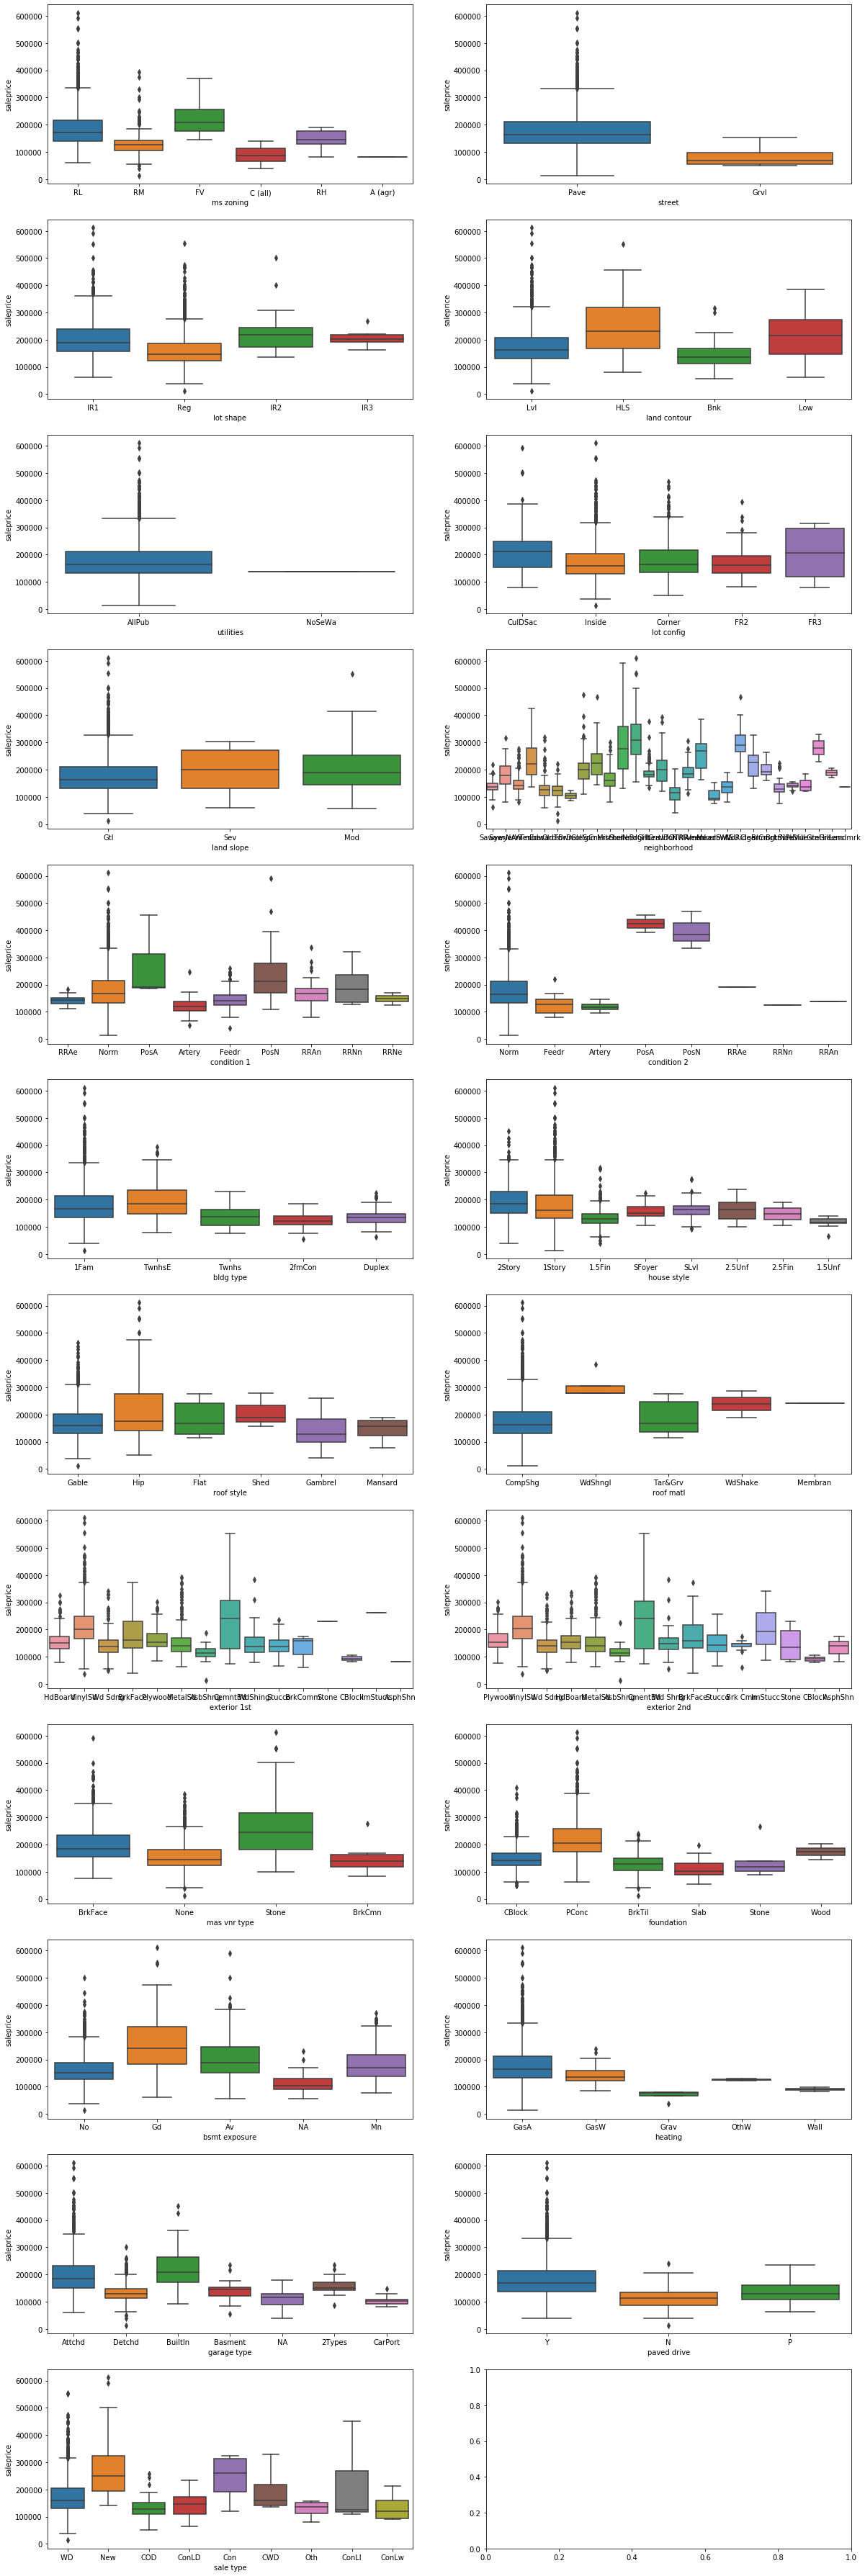

In [40]:
# Boxplot of categorical variables to see if there's any distict correlations

fig, ax = plt.subplots(12,2,figsize=(20,65))

for var, subplot in zip(df.select_dtypes(include='object'), ax.ravel()):
    sns.boxplot(x=var, y='saleprice', data=df, ax=subplot)

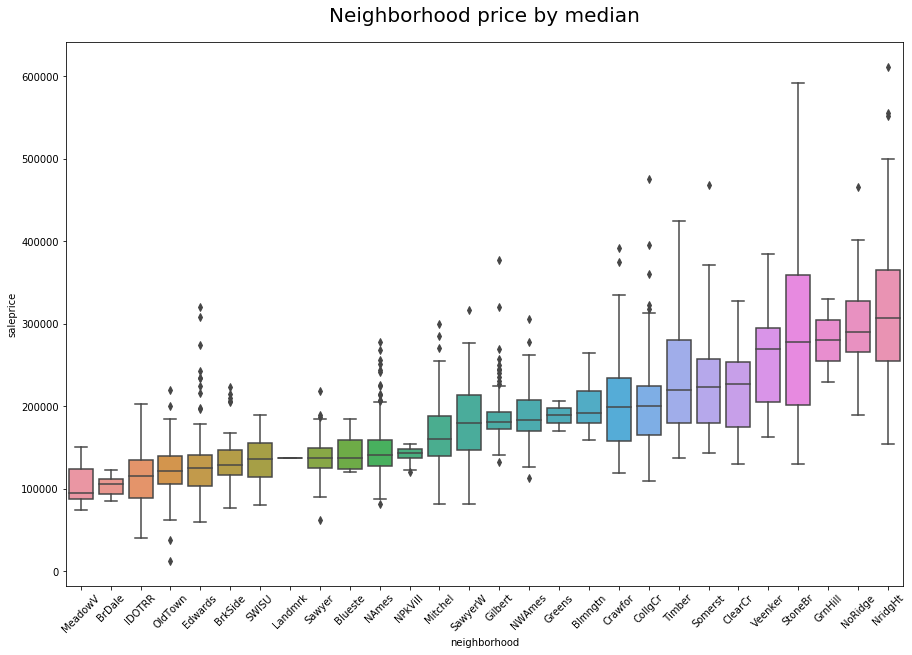

In [41]:
# Plot neighbourhood sorted by median

sorted_neighborhood = df.groupby('neighborhood')['saleprice'].median().sort_values()

fig, ax = plt.subplots(figsize = (15,10))

chart = sns.boxplot(
    x='neighborhood', 
    y='saleprice',
    data=df,
    order=list(sorted_neighborhood.index)
)

ax.set_title('Neighborhood price by median',fontsize=20,pad=20)
ax.set_xticklabels(chart.get_xticklabels(),rotation=45);

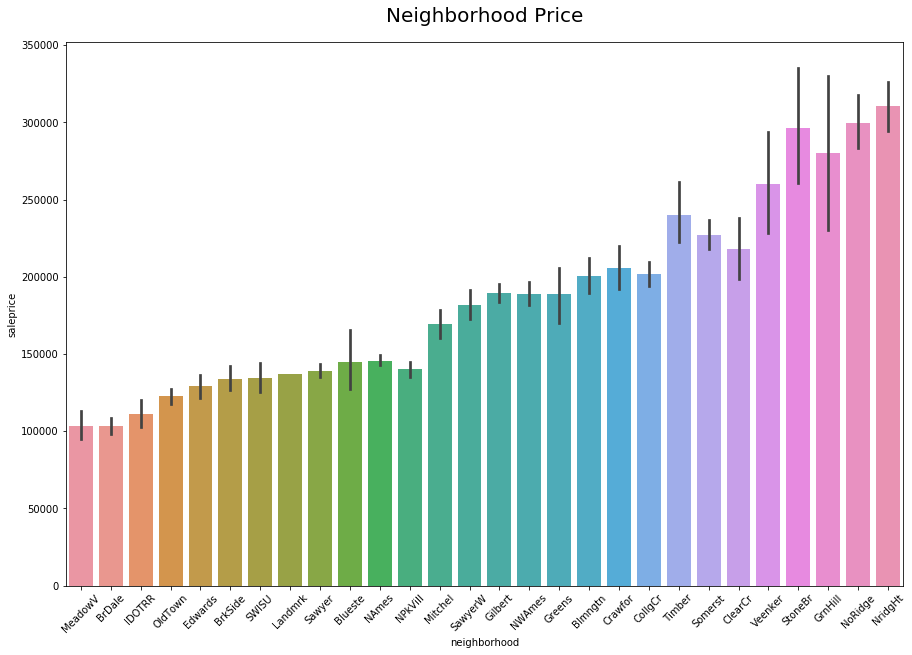

In [42]:
sorted_neighborhood = df.groupby('neighborhood')['saleprice'].median().sort_values()

fig, ax = plt.subplots(figsize = (15,10))

chart = sns.barplot(
    x='neighborhood', 
    y='saleprice',
    data=df,
    order=list(sorted_neighborhood.index)
)

ax.set_title('Neighborhood Price',fontsize=20,pad=20)
ax.set_xticklabels(chart.get_xticklabels(),rotation=45);

### Correlations

In [43]:
# Pearson Correlation with saleprice
cor_pearson = abs(df.corr()['saleprice'])

# Selecting highly correlated features >50% to saleprice
cor_pearson[cor_pearson>0.5].sort_values()

fireplace qu      0.518439
garage yr blt     0.549877
garage finish     0.552107
year remod/add    0.561180
age               0.587234
year built        0.587637
bsmt qual         0.619184
1st flr sf        0.624670
garage cars       0.633202
garage area       0.639193
total bsmt sf     0.652743
gr liv area       0.661102
kitchen qual      0.682872
exter qual        0.721274
overall qual      0.800209
saleprice         1.000000
Name: saleprice, dtype: float64

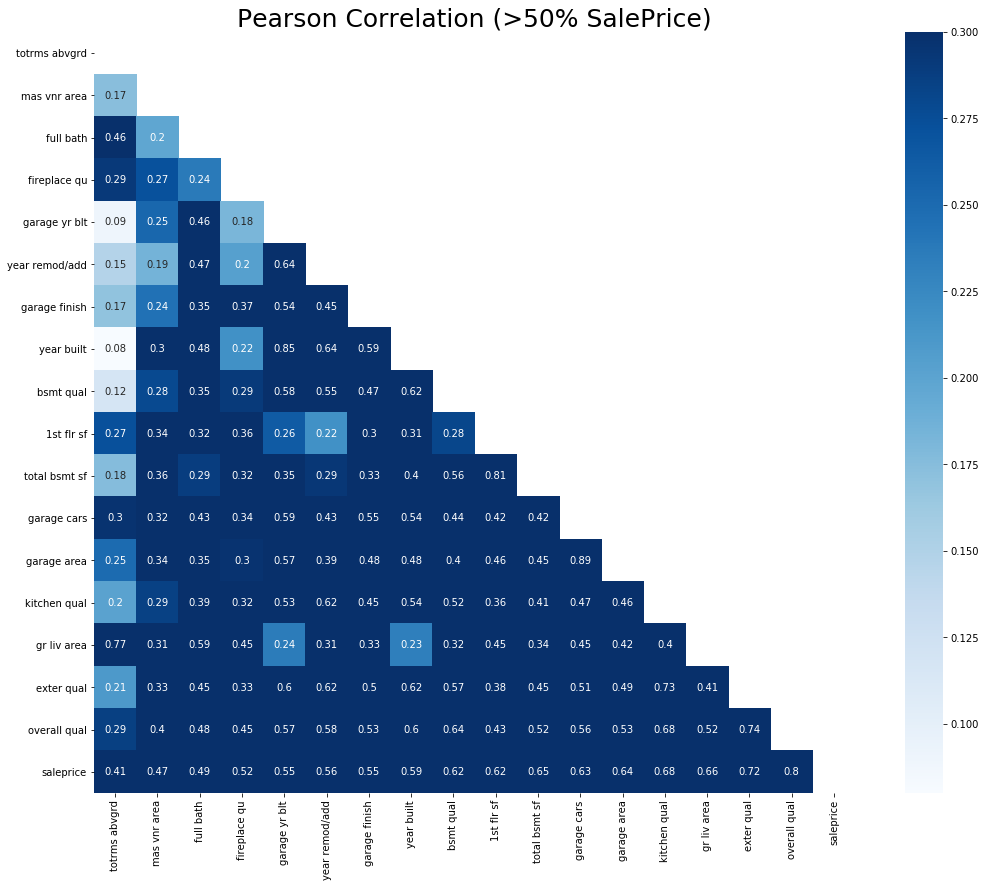

In [44]:
# Heatmap of pearson correlations

pearson = df[['totrms abvgrd', 'mas vnr area', 'full bath', 'fireplace qu',
       'garage yr blt', 'year remod/add', 'garage finish', 'year built',
       'bsmt qual', '1st flr sf', 'total bsmt sf', 'garage cars',
       'garage area', 'kitchen qual', 'gr liv area', 'exter qual',
       'overall qual', 'saleprice']]

fig,ax = plt.subplots(figsize=(18,14))

# Set the title.
ax.set_title('Pearson Correlation (>50% SalePrice)' , fontsize=25, y=1);

# Masking
mask = np.zeros_like(pearson.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(pearson.corr(), mask=mask, vmax=.3, square=True, annot = True, cmap='Blues')

In [45]:
# Spearman Correlation with saleprice
cor_spearman = abs(df.corr(method='spearman')['saleprice'])

# Selecting highly correlated features
cor_spearman[cor_spearman>0.5].sort_values()

heating qc        0.514997
fireplace qu      0.516312
1st flr sf        0.535822
total bsmt sf     0.577144
full bath         0.589700
garage finish     0.617289
year remod/add    0.625109
garage area       0.630993
garage yr blt     0.646396
kitchen qual      0.672989
garage cars       0.678751
gr liv area       0.682908
age               0.685643
year built        0.688505
bsmt qual         0.696304
exter qual        0.697809
overall qual      0.794635
saleprice         1.000000
Name: saleprice, dtype: float64

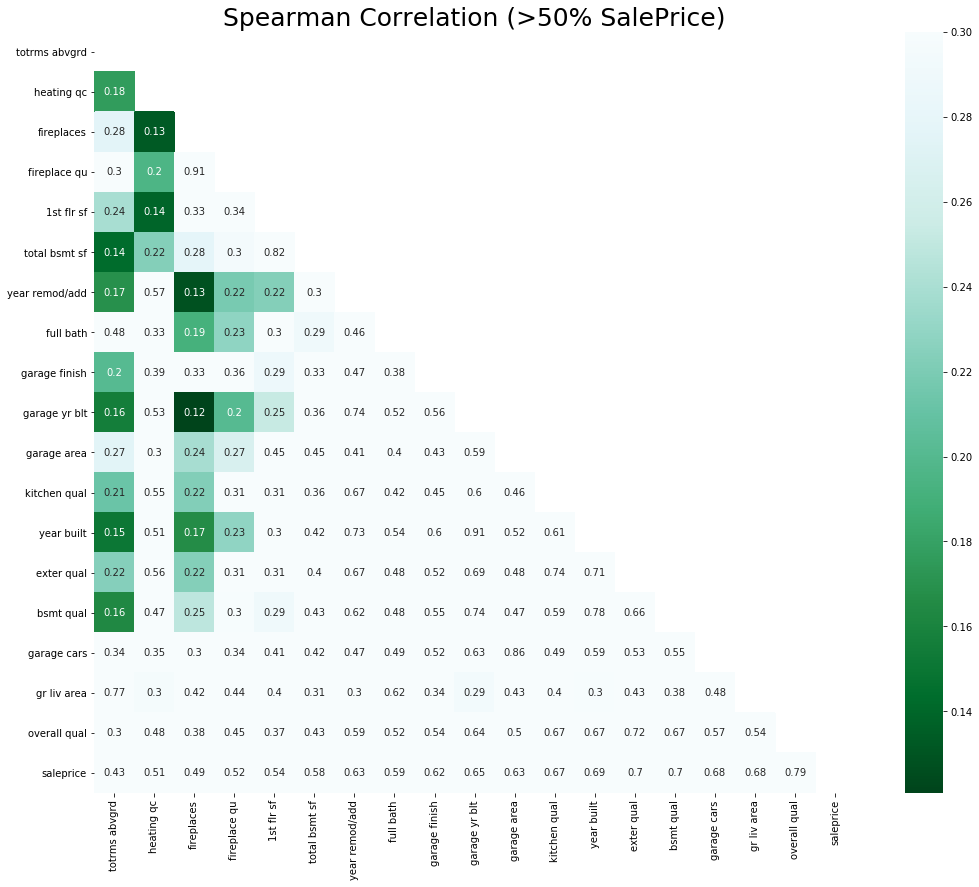

In [46]:
# Spearman correlation to see if there's significance difference to ordinal features

spearman = df[['totrms abvgrd', 'heating qc', 'fireplaces', 'fireplace qu',
       '1st flr sf', 'total bsmt sf', 'year remod/add', 'full bath',
       'garage finish', 'garage yr blt', 'garage area', 'kitchen qual',
       'year built', 'exter qual', 'bsmt qual', 'garage cars', 'gr liv area',
       'overall qual', 'saleprice']]

fig,ax = plt.subplots(figsize=(18,14))

# Set the title.
ax.set_title('Spearman Correlation (>50% SalePrice)' , fontsize=25, y=1);

# Masking
mask = np.zeros_like(spearman.corr(method='spearman'))
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(spearman.corr(method='spearman'), mask=mask, vmax=.3, square=True, annot = True, cmap='BuGn_r')

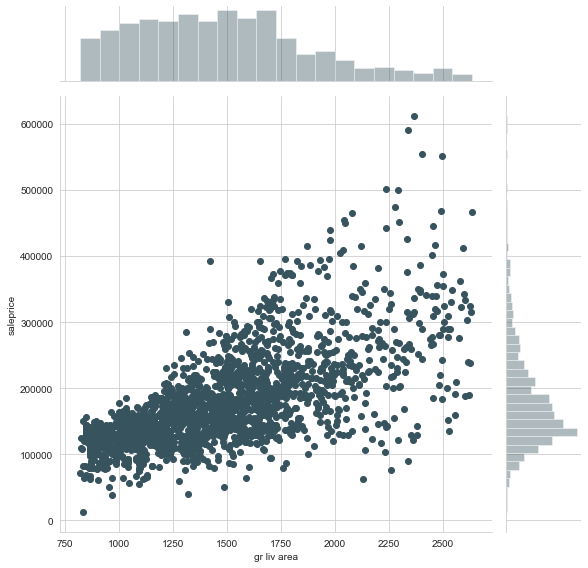

In [47]:
# gr liv area against saleprice with outliers filtered

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

# greater gr liv area, higher saleprice.
sns.jointplot(x='gr liv area',y='saleprice',data=df,height=8);

## Pre-processing

In [48]:
df.select_dtypes(exclude='object').columns

Index(['id', 'pid', 'ms subclass', 'lot frontage', 'lot area', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'mas vnr area',
       'exter qual', 'exter cond', 'bsmt qual', 'bsmt cond', 'bsmtfin type 1',
       'bsmtfin sf 1', 'bsmtfin type 2', 'bsmtfin sf 2', 'bsmt unf sf',
       'total bsmt sf', 'heating qc', 'central air', 'electrical',
       '1st flr sf', '2nd flr sf', 'low qual fin sf', 'gr liv area',
       'bsmt full bath', 'bsmt half bath', 'full bath', 'half bath',
       'bedroom abvgr', 'kitchen abvgr', 'kitchen qual', 'totrms abvgrd',
       'functional', 'fireplaces', 'fireplace qu', 'garage yr blt',
       'garage finish', 'garage cars', 'garage area', 'garage qual',
       'garage cond', 'wood deck sf', 'open porch sf', 'enclosed porch',
       '3ssn porch', 'screen porch', 'pool area', 'misc val', 'mo sold',
       'yr sold', 'saleprice', 'neighborhood_Blueste', 'neighborhood_BrDale',
       'neighborhood_BrkSide', 'neighborhood_ClearCr', 'nei

In [49]:
# Identify X,y

# features with >50% correlation with saleprice
features = ['id', 'pid', 'ms subclass', 'lot frontage', 'lot area', 'overall qual',
       'overall cond', 'year built', 'year remod/add', 'mas vnr area',
       'exter qual', 'exter cond', 'bsmt qual', 'bsmt cond', 'bsmtfin type 1',
       'bsmtfin sf 1', 'bsmtfin type 2', 'bsmtfin sf 2', 'bsmt unf sf',
       'total bsmt sf', 'heating qc', 'central air', 'electrical',
       '1st flr sf', '2nd flr sf', 'low qual fin sf', 'gr liv area',
       'bsmt full bath', 'bsmt half bath', 'full bath', 'half bath',
       'bedroom abvgr', 'kitchen abvgr', 'kitchen qual', 'totrms abvgrd',
       'functional', 'fireplaces', 'fireplace qu', 'garage yr blt',
       'garage finish', 'garage cars', 'garage area', 'garage qual',
       'garage cond', 'wood deck sf', 'open porch sf', 'enclosed porch',
       '3ssn porch', 'screen porch', 'pool area', 'misc val', 'mo sold',
       'yr sold', 'neighborhood_Blueste', 'neighborhood_BrDale',
       'neighborhood_BrkSide', 'neighborhood_ClearCr', 'neighborhood_CollgCr',
       'neighborhood_Crawfor', 'neighborhood_Edwards', 'neighborhood_Gilbert',
       'neighborhood_Greens', 'neighborhood_GrnHill', 'neighborhood_IDOTRR',
       'neighborhood_Landmrk', 'neighborhood_MeadowV', 'neighborhood_Mitchel',
       'neighborhood_NAmes', 'neighborhood_NPkVill', 'neighborhood_NWAmes',
       'neighborhood_NoRidge', 'neighborhood_NridgHt', 'neighborhood_OldTown',
       'neighborhood_SWISU', 'neighborhood_Sawyer', 'neighborhood_SawyerW',
       'neighborhood_Somerst', 'neighborhood_StoneBr', 'neighborhood_Timber',
       'neighborhood_Veenker']

X = df[features]
y = df['saleprice']

In [50]:
# Train Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [51]:
# Scaling

ss = StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

## Modeling

In [52]:
# Fit linear regression

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print(lr.intercept_)
print(lr.coef_)

180184.79218754102
[-6.86754583e+03  2.59866099e+03 -7.14851174e+03 -5.50375245e+02
  4.77219063e+03  1.22052154e+04  5.76686778e+03  1.03429619e+04
  1.55496947e+03  2.64576038e+03  6.73841648e+03 -1.77710086e+03
  2.93759608e+03 -1.71220204e+03 -9.44802737e+02 -6.08353848e+16
  2.84462645e+02 -2.17346141e+16 -5.84689100e+16  5.66701967e+16
  1.32739255e+03 -1.10460380e+03 -4.21106704e+02  3.04320036e+16
  3.48414253e+16  3.41833471e+15 -3.46664417e+16  6.69606015e+02
  2.65022453e+02 -5.55795964e+02  7.90516984e+02 -2.20091161e+03
 -1.24847438e+03  4.02757127e+03  3.48984177e+03  3.72224566e+03
  2.84885707e+03 -4.98735271e+02  1.19220398e+03  1.49565628e+03
 -2.82833556e+02  6.40016118e+03  1.68888526e+03 -5.06232097e+03
  1.52500385e+03  7.90310720e+02  8.33890933e+02  2.29813831e+02
  2.89336395e+03  4.53390381e+02  2.18749477e+02  2.88792199e+02
 -7.67398685e+03  2.67995575e+02  7.74430551e+02  1.59587652e+03
  8.31782108e+02 -1.39102122e+03  4.11323164e+03 -4.65586658e+02
  3.58

In [54]:
print(f'train score: {lr.score(X_train_scaled,y_train)}')
print(f'test score: {lr.score(X_test_scaled,y_test)}')

train score: 0.9033417552022714
test score: 0.8872542058244713


In [55]:
# LR Cross Val

# R2
lr_scores = cross_val_score(lr,X_train_scaled,y_train)
print(f'R2 score : {lr_scores.mean()}')

# MSE
lr_scores = -cross_val_score(lr,X_train_scaled,y_train,scoring='neg_mean_squared_error')
print(f'MSE score: {lr_scores.mean()}')

R2 score : -4205.5143677113865
MSE score: 21789342772771.215


In [56]:
# Ridge Cross Val
ridge = RidgeCV(alphas=np.linspace(.1,10,100))

# R2
ridge_scores_r2 = cross_val_score(ridge,X_train_scaled,y_train)
print(f'R2 score: {ridge_scores_r2.mean()}')

# MSE
ridge_scores = -cross_val_score(ridge,X_train_scaled,y_train,scoring='neg_mean_squared_error')
print(f'MSE score: {ridge_scores.mean()}')

R2 score: 0.8875255408157912
MSE score: 570585123.2269142


In [57]:
# Lasso Cross Val
lasso = LassoCV(n_alphas=200)

# R2
lasso_scores = cross_val_score(lasso,X_train_scaled,y_train)
print(f'R2 score: {lasso_scores.mean()}')

# MSE
lasso_scores_mse = -cross_val_score(lasso,X_train_scaled,y_train,scoring='neg_mean_squared_error')
print(f'MSE score: {lasso_scores_mse.mean()}')

R2 score: 0.8879983332696415
MSE score: 568849299.3056359


In [58]:
# Fit Lasso to training data set

lasso.fit(X_train_scaled,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [59]:
# train score
print(f'train score: {lasso.score(X_train_scaled,y_train)}')

# test score
print(f'test score: {lasso.score(X_test_scaled,y_test)}')

# lasso score R2
print(f'R2: {lasso_scores.mean()}')

train score: 0.9021326732162444
test score: 0.9209909690804797
R2: 0.8879983332696415


In [60]:
# Top 25 features

pd.Series(abs(lasso.coef_),index=features).sort_values(ascending= False).nlargest(25)

gr liv area             17703.577486
overall qual            12898.992773
bsmtfin sf 1            12065.106439
year built               8239.638860
neighborhood_NridgHt     7266.690591
exter qual               6978.724188
ms subclass              6304.899651
garage area              6179.322838
1st flr sf               5140.006721
overall cond             4919.243211
neighborhood_StoneBr     4524.465756
lot area                 4270.110319
kitchen qual             4117.904029
neighborhood_Crawfor     3566.411699
functional               3342.043916
neighborhood_GrnHill     3289.622189
garage cond              2766.186064
bsmt qual                2719.585930
mas vnr area             2652.833429
screen porch             2638.923356
totrms abvgrd            2609.468348
fireplaces               2607.147160
total bsmt sf            2394.710790
neighborhood_NWAmes      2351.984909
neighborhood_Somerst     2244.656445
dtype: float64

### Final Modelling

In [61]:
# Top 25 highest coefficient

pd.Series(abs(lasso.coef_),index=features).sort_values(ascending= False).nlargest(25).index

Index(['gr liv area', 'overall qual', 'bsmtfin sf 1', 'year built',
       'neighborhood_NridgHt', 'exter qual', 'ms subclass', 'garage area',
       '1st flr sf', 'overall cond', 'neighborhood_StoneBr', 'lot area',
       'kitchen qual', 'neighborhood_Crawfor', 'functional',
       'neighborhood_GrnHill', 'garage cond', 'bsmt qual', 'mas vnr area',
       'screen porch', 'totrms abvgrd', 'fireplaces', 'total bsmt sf',
       'neighborhood_NWAmes', 'neighborhood_Somerst'],
      dtype='object')

In [62]:
final_features = ['gr liv area', 'overall qual', 'bsmtfin sf 1', 'year built',
       'neighborhood_NridgHt', 'exter qual', 'ms subclass', 'garage area',
       '1st flr sf', 'overall cond', 'neighborhood_StoneBr', 'lot area',
       'kitchen qual', 'neighborhood_Crawfor', 'functional', 'garage cond', 'bsmt qual', 'mas vnr area',
       'screen porch', 'totrms abvgrd', 'fireplaces', 'total bsmt sf',
       'neighborhood_NWAmes', 'neighborhood_Somerst']

In [63]:
# Train new features

X2 = df[final_features]
y2 = df['saleprice']

# Train test split

X_train,X_test,y_train,y_test = train_test_split(X2,y2,random_state=42)

In [64]:
# Scaling

ss_final = StandardScaler()
ss_final.fit(X_train)
X_train_scaled = ss_final.transform(X_train)
X_test_scaled = ss_final.transform(X_test)

In [65]:
# Fit linear regression

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# LR Cross Val

# R2
lr_scores = cross_val_score(lr,X_train_scaled,y_train)
print(f'R2 score : {lr_scores.mean()}')

# MSE
lr_scores = -cross_val_score(lr,X_train_scaled,y_train,scoring='neg_mean_squared_error')
print(f'MSE score: {lr_scores.mean()}')

R2 score : 0.8847063899336826
MSE score: 585040036.3875766


In [67]:
# Ridge Cross Val
ridge_model = RidgeCV(alphas=np.linspace(.1,10,100))

# R2
ridge_scores_r2 = cross_val_score(ridge_model,X_train_scaled,y_train)
print(f'R2 score: {ridge_scores_r2.mean()}')

# MSE
ridge_scores = -cross_val_score(ridge_model,X_train_scaled,y_train,scoring='neg_mean_squared_error')
print(f'MSE score: {ridge_scores.mean()}')

R2 score: 0.8848004812834793
MSE score: 584509831.6314864


In [68]:
# Lasso Cross Val
lasso_model = LassoCV(n_alphas=200)

# R2
lasso_scores = cross_val_score(lasso_model,X_train_scaled,y_train)
print(f'R2 score: {lasso_scores.mean()}')

# MSE
lasso_scores_mse = -cross_val_score(lasso_model,X_train_scaled,y_train,scoring='neg_mean_squared_error')
print(f'MSE score: {lasso_scores_mse.mean()}')

R2 score: 0.8845279007940177
MSE score: 586023332.7783396


In [69]:
# Fit lasso to training data set 

lasso_model.fit(X_train_scaled,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=200, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [70]:
# Fit ridge to training data set

ridge_model.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [71]:
# Lasso train score
print(f'train score: {lasso_model.score(X_train_scaled,y_train)}')

# Lasso test score
print(f'test score: {lasso_model.score(X_test_scaled,y_test)}')

# lasso score R2
print(f'R2: {lasso_scores.mean()}')

# Optimal value of alpha
lasso_optimal_alpha = lasso_model.alpha_
print(f'optimal alpha: {lasso_optimal_alpha}')

train score: 0.8920823547411736
test score: 0.9146416286016973
R2: 0.8845279007940177
optimal alpha: 56.573980097381664


In [72]:
# Ridge train score
print(f'train score: {ridge_model.score(X_train_scaled,y_train)}')

# Ridge test score
print(f'test score: {ridge_model.score(X_test_scaled,y_test)}')

# Optimal value of alpha
ridge_optimal_alpha = ridge_model.alpha_
print(f'optimal alpha: {ridge_optimal_alpha}')

train score: 0.892076449737458
test score: 0.9147507272747415
optimal alpha: 10.0


## Inferential Visualizations

In [73]:
# Train residuals

predictions = lasso_model.predict(X_train_scaled)
residuals = y_train - predictions
residuals.mean()

-6.6237001213205615e-12

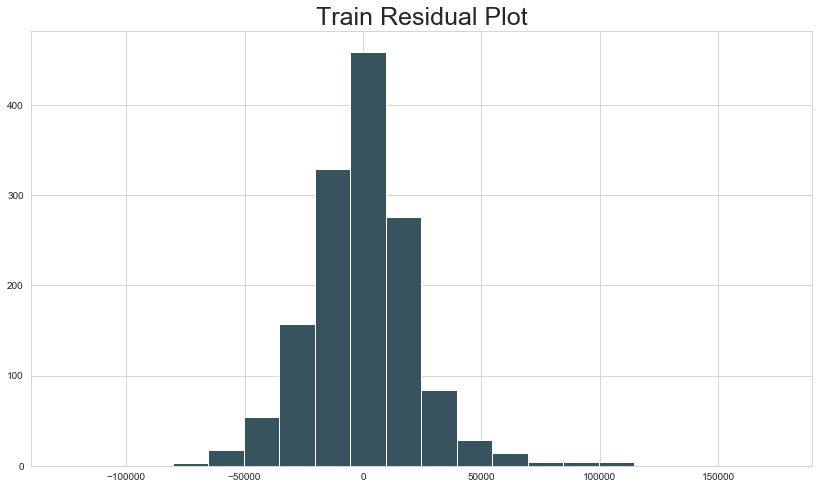

In [74]:
fig,ax = plt.subplots(figsize=(14,8))

# Set tile
ax.set_title('Train Residual Plot',fontsize=25)

plt.hist(residuals,bins=20);

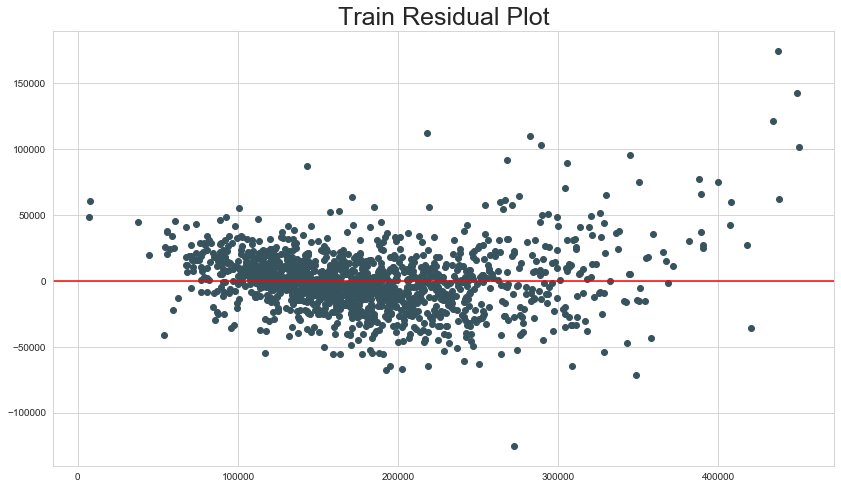

In [75]:
# Use np.random.randn to show what we expect in a residual plot
fig,ax = plt.subplots(figsize=(14,8))

# Set tile
ax.set_title('Train Residual Plot',fontsize=25)

plt.scatter(predictions, residuals)
plt.axhline(0, color='r');

### Inference

The residual plot appears to be normally distributed at mean 0. Although the scatter plot of the residuals doesn't appear to be perfectly scattered, but it doesn't show any patterns in the residual. 

## Test Data

In [76]:
df_test = pd.read_csv('datasets/test.csv', keep_default_na=False)

In [77]:
# Change column name to lowercase

df_test.columns = df_test.columns.str.lower()
df_test.head()

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type
0,2658,902301120,190,RM,69,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NA,Detchd,1910,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NA,Attchd,1977,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NA,Detchd,1935,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD


In [78]:
# replace empty string with nan and change it to float

float_list = ['lot frontage', 'mas vnr area', 'bsmtfin sf 1', 'bsmtfin sf 2','bsmt unf sf', 'total bsmt sf', 'bsmt full bath', 'bsmt half bath','garage yr blt', 'garage cars', 'garage area']

for columns in float_list:
    df_test[columns] = df_test[columns].map(lambda x : np.nan if x == '' else float(x))

In [79]:
# replace empty string with nan

object_list = ['ms zoning', 'street', 'alley', 'lot shape', 'land contour',
       'utilities', 'lot config', 'land slope', 'neighborhood', 'condition 1',
       'condition 2', 'bldg type', 'house style', 'roof style', 'roof matl',
       'exterior 1st', 'exterior 2nd', 'mas vnr type', 'exter qual',
       'exter cond', 'foundation', 'bsmt qual', 'bsmt cond', 'bsmt exposure',
       'bsmtfin type 1', 'bsmtfin type 2', 'heating', 'heating qc',
       'central air', 'electrical', 'kitchen qual', 'functional',
       'fireplace qu', 'garage type', 'garage finish', 'garage qual',
       'garage cond', 'paved drive', 'pool qc', 'fence', 'misc feature',
       'sale type']

for columns in object_list:
    df_test[columns] = df_test[columns].map(lambda x : np.nan if x == '' else x)

In [80]:
# Fill garage yr blt null values corresponding to the year built
df_test['garage yr blt'].fillna(df_test['year built'],inplace=True)

In [81]:
# Ordinal categorical columns

qual = {'NA' : 0,
        'Po' : 1,
        'Fa' : 2,
        'TA' : 3,
        'Gd' : 4,
        'Ex' : 5}

df_test['kitchen qual'] = df_test['kitchen qual'].map(qual)
df_test['exter qual'] = df_test['exter qual'].map(qual)
df_test['exter cond'] = df_test['exter cond'].map(qual)
df_test['bsmt qual'] = df_test['bsmt qual'].map(qual)
df_test['bsmt cond'] = df_test['bsmt cond'].map(qual)
df_test['heating qc'] = df_test['heating qc'].map(qual)
df_test['fireplace qu'] = df_test['fireplace qu'].map(qual)
df_test['garage qual'] = df_test['garage qual'].map(qual)
df_test['garage cond'] = df_test['garage cond'].map(qual)

In [82]:
elec_system = {'Mix': 0,
               'FuseP': 1,
               'FuseF': 2,
               'FuseA': 3,
               'SBrkr': 4}

df_test['electrical'] = df_test['electrical'].map(elec_system)

In [83]:
finish = {'NA': 0,
          'Unf': 1,
          'RFn': 2,
          'Fin': 3}

df_test['garage finish'] = df_test['garage finish'].map(finish)

In [84]:
type_qual = {'NA':0,
             'Unf':1,
             'LwQ':2,
             'Rec':3,
             'BLQ':4,
             'ALQ':5,
             'GLQ':6}

df_test['bsmtfin type 1'] = df_test['bsmtfin type 1'].map(type_qual)
df_test['bsmtfin type 2'] = df_test['bsmtfin type 2'].map(type_qual)

In [85]:
func_rating = {'Sal':0,
               'Sev':1,
               'Maj2':2,
               'Maj1':3,
               'Mod':4,
               'Min2':5,
               'Min1':6,
               'Typ':7}

df_test['functional'] = df_test['functional'].map(func_rating)

In [86]:
df_test['central air'] = df_test['central air'].map({'Y':1,'N':0})

In [87]:
# Mode imputation

df_test['garage finish'].fillna(df_test['garage finish'].mode()[0],inplace=True)
df_test['electrical'].fillna(df_test['electrical'].mode()[0],inplace=True)

In [88]:
# Mean imputation

df_test['mas vnr area'].fillna(df_test['mas vnr area'].mean(),inplace=True)

In [89]:
df_test.isnull().sum().sort_values(ascending=False).head(2)

lot frontage    160
mas vnr type      1
dtype: int64

In [90]:
# One Hot Encoding 

# neighborhood - norminal

neighborhood_dummies = pd.get_dummies(df_test[['neighborhood']],drop_first=True)

# Concat df and neighborhood

df_test = pd.concat([df_test,neighborhood_dummies],axis=1)

df.head()

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,misc val,mo sold,yr sold,sale type,saleprice,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,age
0,109,533352170,60,RL,79.410584,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3.0,3.0,No,6.0,533.0,1.0,0.0,192.0,725.0,GasA,5,1,4,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2.0,2.0,475.0,3.0,3.0,Y,0,44,0,0,0,0,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,34
1,544,531379050,60,RL,43.000000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4.0,3.0,No,6.0,637.0,1.0,0.0,276.0,913.0,GasA,5,1,4,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2.0,2.0,559.0,3.0,3.0,Y,0,74,0,0,0,0,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,13
2,153,535304180,20,RL,68.000000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3.0,3.0,No,6.0,731.0,1.0,0.0,326.0,1057.0,GasA,3,1,4,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1.0,1.0,246.0,3.0,3.0,Y,0,52,0,0,0,0,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,57
3,318,916386060,60,RL,73.000000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4.0,3.0,No,1.0,0.0,1.0,0.0,384.0,384.0,GasA,4,1,4,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3.0,2.0,400.0,3.0,3.0,Y,100,0,0,0,0,0,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4
4,255,906425045,50,RL,82.000000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2.0,4.0,No,1.0,0.0,1.0,0.0,676.0,676.0,GasA,3,1,4,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1.0,2.0,484.0,3.0,3.0,N,0,59,0,0,0,0,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,110


### Test Model

In [91]:
# Test.csv as X test set

X_testing = df_test[final_features]

In [92]:
# Scale data

X_testing_scaled = ss_final.transform(X_testing)

In [93]:
# Using lasso model to predict saleprice

df_test_sales = lasso_model.predict(X_testing_scaled)

In [94]:
# create saleprice columns using the predicted values

df_test['saleprice'] = df_test_sales

In [95]:
# Check saleprice

df_test.head()

,id,pid,ms subclass,ms zoning,lot frontage,lot area,street,alley,lot shape,land contour,utilities,lot config,land slope,neighborhood,condition 1,condition 2,bldg type,house style,overall qual,overall cond,year built,year remod/add,roof style,roof matl,exterior 1st,exterior 2nd,mas vnr type,mas vnr area,exter qual,exter cond,foundation,bsmt qual,bsmt cond,bsmt exposure,bsmtfin type 1,bsmtfin sf 1,bsmtfin type 2,bsmtfin sf 2,bsmt unf sf,total bsmt sf,heating,heating qc,central air,electrical,1st flr sf,2nd flr sf,low qual fin sf,gr liv area,bsmt full bath,bsmt half bath,full bath,half bath,bedroom abvgr,kitchen abvgr,kitchen qual,totrms abvgrd,functional,fireplaces,fireplace qu,garage type,garage yr blt,garage finish,garage cars,garage area,garage qual,garage cond,paved drive,wood deck sf,open porch sf,enclosed porch,3ssn porch,screen porch,pool area,pool qc,fence,misc feature,misc val,mo sold,yr sold,sale type,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,saleprice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,No,1,0.0,1,0.0,1020.0,1020.0,GasA,4,0,1.0,908,1020,0,1928,0.0,0.0,2,0,4,2,2,9,7,0,0,Detchd,1910.0,1.0,1.0,440.0,1,1,Y,0,60,112,0,0,0,NA,NA,NA,0,4,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,135269.874922
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,No,1,0.0,1,0.0,1967.0,1967.0,GasA,3,1,4.0,1967,0,0,1967,0.0,0.0,2,0,6,2,3,10,7,0,0,Attchd,1977.0,3.0,2.0,580.0,3,3,Y,170,0,0,0,0,0,NA,NA,NA,0,8,2006,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,170879.179653
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,Av,6,554.0,1,0.0,100.0,654.0,GasA,5,1,4.0,664,832,0,1496,1.0,0.0,2,1,3,1,4,7,7,1,4,Attchd,2006.0,2.0,2.0,426.0,3,3,Y,100,24,0,0,0,0,NA,NA,NA,0,9,2006,New,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205830.682231
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,No,1,0.0,1,0.0,968.0,968.0,GasA,3,1,4.0,968,0,0,968,0.0,0.0,1,0,2,1,3,5,7,0,0,Detchd,1935.0,1.0,2.0,480.0,2,3,N,0,0,184,0,0,0,NA,NA,NA,0,7,2007,WD,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,110627.315803
4,625,535105100,20,RL,NaN,9500,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,No,4,609.0,1,0.0,785.0,1394.0,GasA,4,1,4.0,1394,0,0,1394,1.0,0.0,1,1,3,1,3,6,7,2,4,Attchd,1963.0,2.0,2.0,514.0,3,3,Y,0,76,0,0,185,0,NA,NA,NA,0,7,2009,WD,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,190670.801488


In [96]:
# A copy of df_test

df_test_copy = df_test.copy()

In [97]:
# Sort by id

df_sample = df_test_copy[['id','saleprice']].sort_values(by='id')

In [98]:
# Rename columns

df_sample.columns = ['Id','SalePrice']

In [99]:
df_sample.head()

,Id,SalePrice
704,2,134438.560700
706,4,276296.366021
120,6,188471.031153
312,7,238934.229398
401,17,222808.175971


In [100]:
# Save dataframe

df_sample.to_csv('datasets/submission3.csv',index=False)

In [101]:
df.corr()['saleprice'].nlargest(30)

saleprice               1.000000
overall qual            0.800209
exter qual              0.721274
kitchen qual            0.682872
gr liv area             0.661102
total bsmt sf           0.652743
garage area             0.639193
garage cars             0.633202
1st flr sf              0.624670
bsmt qual               0.619184
year built              0.587637
year remod/add          0.561180
garage finish           0.552107
garage yr blt           0.549877
fireplace qu            0.518439
full bath               0.488501
mas vnr area            0.474269
bsmtfin sf 1            0.470412
heating qc              0.455873
neighborhood_NridgHt    0.452238
fireplaces              0.450226
totrms abvgrd           0.405208
bsmtfin type 1          0.372039
open porch sf           0.337205
lot frontage            0.306510
bsmt full bath          0.298944
wood deck sf            0.291375
lot area                0.276359
garage qual             0.261647
central air             0.248724
Name: sale

## Business Recommendations

It has been observed that the key features that affect the sale price of a property is overall quality, age, size and the neighborhood that the property is located. The feature that appears to add most value to a property is the overall quality of the house and size of the ground living area. The fact that quality has more correlation than condition is that condition defect progress with age while in contrast a quality property grows with age. While size of property is always one of the factor when it comes to measuring of price, we have observed that the greater the proportion of overall ground living area, the higher the sale price is. However, there's one features that can negatively affect the sale price of a property. In one of the correlation analysis, we saw that an increase in the age of the property leads to drop in sale price.  

Homeowners can actually consider furnishing the overall quality and condition of the house before making a sale so that there's a higher probability that it can fetch a higher price. Since the heart of the home lies in the ground living area, it would be good to give a little update on the tiles and wall paint. Quality repairs to the fixtures and plumbing should also take into considerations as quality is one of the top positive correlation to sale price. Moreover if the property is located in areas like NorthRidge Heights and NorthRidge, homeowners can expect a higher sale price as compared to property in the other neighborhood.

It should be noted that this model will not generalize to a certain extent as the model only take into consideration of how property price is valuated in Aimes. The model includes the neighborhoods of Aimes in the modelling process hence it might not be applicable to other county or countries. However, in order to create a generalized model that can be used for any property, more datasets from various countries might be needed in the analysing process.

